<a href="https://colab.research.google.com/github/mfilipak/FILIPAK-DATA-SCIENCE/blob/main/DIA7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/mfilipak/FILIPAK-DATA-SCIENCE/raw/main/DATA/2021_Time_Volume_Price.zip

'wget' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [2]:
!ls

'ls' nÆo ‚ reconhecido como um comando interno
ou externo, um programa oper vel ou um arquivo em lotes.


In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os
import cv2
import random

In [429]:
df = pd.read_csv("./2021_Time_Volume_Price.zip", index_col=0)
df = df.drop(["MeanPrice", "MinPrice", "MaxPrice", "OpenPrice"], axis=1)

In [430]:
df

,Volume,ClosePrice
Seconds,,
61045175.0,0.0,114590.0
61045176.0,0.0,114590.0
61045177.0,0.0,114590.0
61045178.0,0.0,114590.0
61045179.0,0.0,114590.0
...,...,...
72899705.0,0.0,121200.0
72899706.0,0.0,121200.0
72899707.0,0.0,121200.0


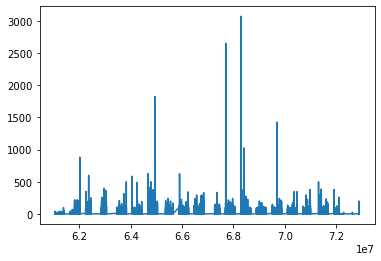

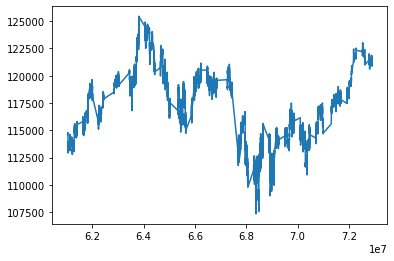

In [431]:
plt.plot(df["Volume"])
plt.show()
plt.plot(df["ClosePrice"])

In [437]:
(df.index[-1]-df.index[0])/3600/24, "dias"

(137.21114583333335, 'dias')

In [439]:
delta_t = [0]+list(df.index[1:]-df.index[:-1])
df["DELTA_T"] = delta_t
df

,Volume,ClosePrice,DELTA_T
Seconds,,,
61045175.0,0.0,114590.0,0.0
61045176.0,0.0,114590.0,1.0
61045177.0,0.0,114590.0,1.0
61045178.0,0.0,114590.0,1.0
61045179.0,0.0,114590.0,1.0
...,...,...,...
72899705.0,0.0,121200.0,1.0
72899706.0,0.0,121200.0,1.0
72899707.0,0.0,121200.0,1.0


In [441]:
decay = 0.01
mean_volume = [0]
for v in np.array(df["Volume"]):
  mean_volume += [mean_volume[-1]*(1-decay)+decay*v]

decay = 0.00001
mean_price = [df.iloc[0]["ClosePrice"]]
for p in np.array(df["ClosePrice"]):
  mean_price += [mean_price[-1]*(1-decay)+decay*p]




In [442]:
df["MEAN_PRICE"] = mean_price[1:]
df["MEAN_VOLUME"] = mean_volume[1:]
df

,Volume,ClosePrice,DELTA_T,MEAN_PRICE,MEAN_VOLUME
Seconds,,,,,
61045175.0,0.0,114590.0,0.0,114590.000000,0.000000
61045176.0,0.0,114590.0,1.0,114590.000000,0.000000
61045177.0,0.0,114590.0,1.0,114590.000000,0.000000
61045178.0,0.0,114590.0,1.0,114590.000000,0.000000
61045179.0,0.0,114590.0,1.0,114590.000000,0.000000
...,...,...,...,...,...
72899705.0,0.0,121200.0,1.0,118761.903649,1.988666
72899706.0,0.0,121200.0,1.0,118761.928030,1.968779
72899707.0,0.0,121200.0,1.0,118761.952411,1.949092


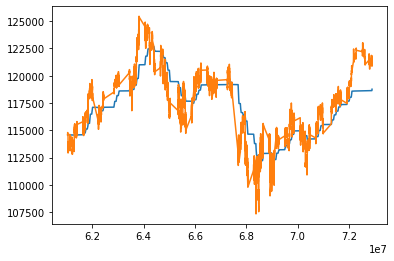

In [443]:
plt.plot(df["MEAN_PRICE"])
plt.plot(df["ClosePrice"])

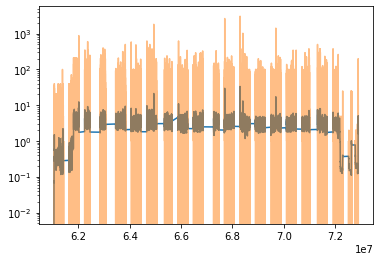

In [444]:
plt.yscale("log")
plt.plot(df["MEAN_VOLUME"])
plt.plot(df["Volume"], alpha=0.5)

In [445]:
df

,Volume,ClosePrice,DELTA_T,MEAN_PRICE,MEAN_VOLUME
Seconds,,,,,
61045175.0,0.0,114590.0,0.0,114590.000000,0.000000
61045176.0,0.0,114590.0,1.0,114590.000000,0.000000
61045177.0,0.0,114590.0,1.0,114590.000000,0.000000
61045178.0,0.0,114590.0,1.0,114590.000000,0.000000
61045179.0,0.0,114590.0,1.0,114590.000000,0.000000
...,...,...,...,...,...
72899705.0,0.0,121200.0,1.0,118761.903649,1.988666
72899706.0,0.0,121200.0,1.0,118761.928030,1.968779
72899707.0,0.0,121200.0,1.0,118761.952411,1.949092


In [446]:
data = df.to_numpy().copy()
data.shape

(2649168, 5)

In [447]:
min_vals = data.min(axis=0, keepdims=True)
max_vals = data.max(axis=0, keepdims=True)
min_vals.shape
max_vals, min_vals

(array([[3.07000000e+03, 1.25440000e+05, 4.12148000e+05, 1.22677965e+05,
         3.34229098e+01]]),
 array([[     0.        , 107350.        ,      0.        ,
         111930.82176845,      0.        ]]))

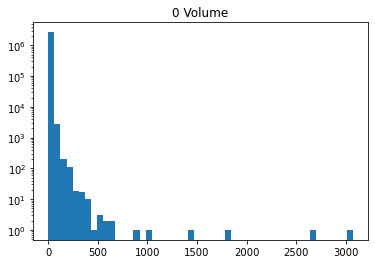

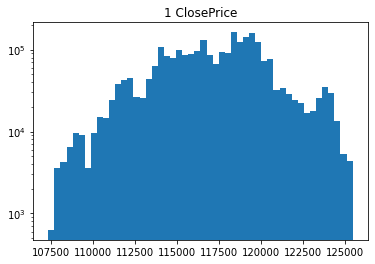

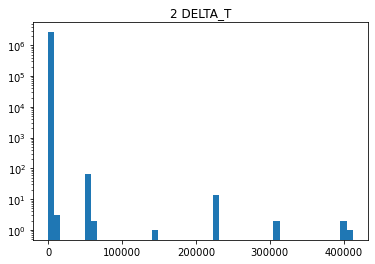

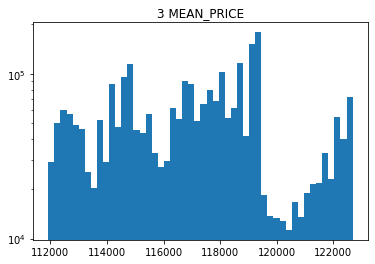

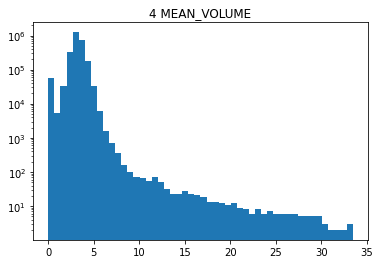

In [86]:
for i in range(5):
    plt.title(str(i) + " "+df.columns[i])
    plt.hist(data[...,i], 50)
    plt.yscale("log")
    plt.show()

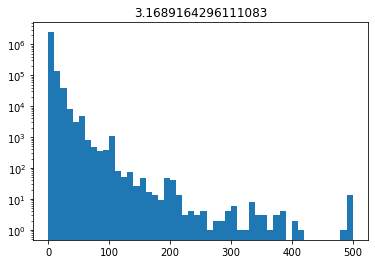

In [87]:
plt.title(data[...,0].mean())
plt.hist( np.clip(data[...,0], 0, 500), 50)
plt.yscale("log")
plt.show()

In [ ]:
# Normalização dos dados
# Volume: média=1
# ClosePrice: minmax
# Delta_t: Sem normalização
# Mean_price: minmax (na escala do ClosePrice)
# Mean_Volume: média=1 (na escala do Volume)

In [449]:
mean_volumes

3.1689164296111083

In [450]:
data = df.to_numpy().copy()

#Volumes:
mean_volumes = data[...,0].mean().copy()
print(mean_volumes)
data[...,0] = data[...,0]/mean_volumes
data[...,4] = data[...,4]/mean_volumes

#Prices:
max_price = data[...,1].max()
min_price = data[...,1].min()
data[...,1] = (data[...,1]-min_price)/(max_price-min_price)
data[...,3] = (data[...,3]-min_price)/(max_price-min_price)


3.1689164296111083


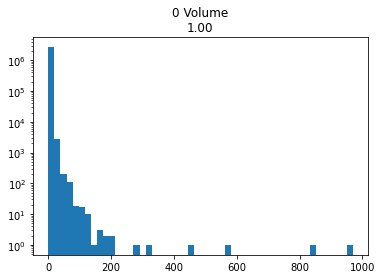

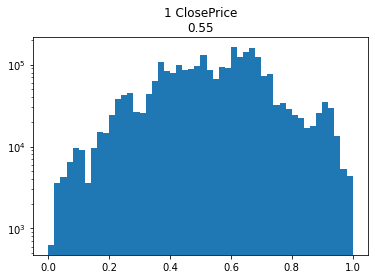

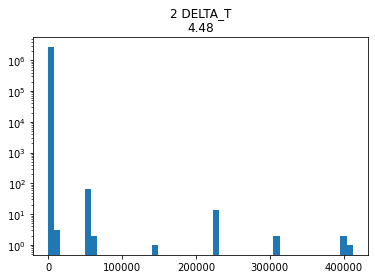

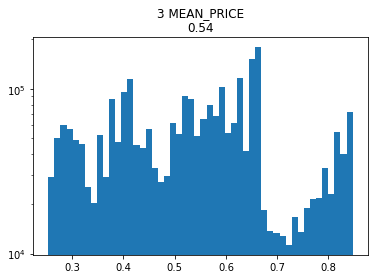

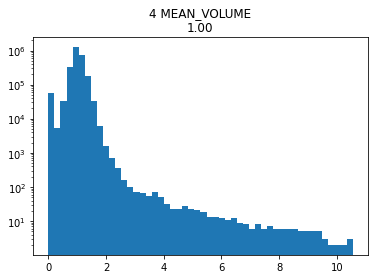

In [451]:
for i in range(5):
    plt.title(str(i) + " "+df.columns[i] + "\n" + f"{data[...,i].mean():.2f}")
    plt.hist(data[...,i], 50)
    plt.yscale("log")
    plt.show()

In [100]:
cut = int(len(data)*0.9)
data_train = data[:cut]
data_test = data[cut:]
len(data_train), len(data_test)

(2384251, 264917)

In [457]:
def generator(d, window_size=100, future_deep=5, jitter=0):
    """
    d: dados de entrada - shape (n,m) onde n é o número de amostras e m o número de features
    window_size = comprimento da saída. número de amostras da saída
    future_deep: O número de amostras do futuro
    jitter: Saltos aleatórios
    """
    i = window_size #inicia numa posição que permite fazer um corte de window_size para trás
    while True:
        print(i) #debug
        yield d[i-window_size:i], d[i:i+future_deep,1] #
        
        if jitter!=0:
            i+=random.randint(1,jitter+1)
        else:
            i+=1
        if i >= (len(d)-future_deep):
            i = window_size

In [456]:
data_train.shape

(2384251, 5)

In [519]:
train_g = generator(data_train[20000:], 1000, future_deep=5, jitter=30)


1000


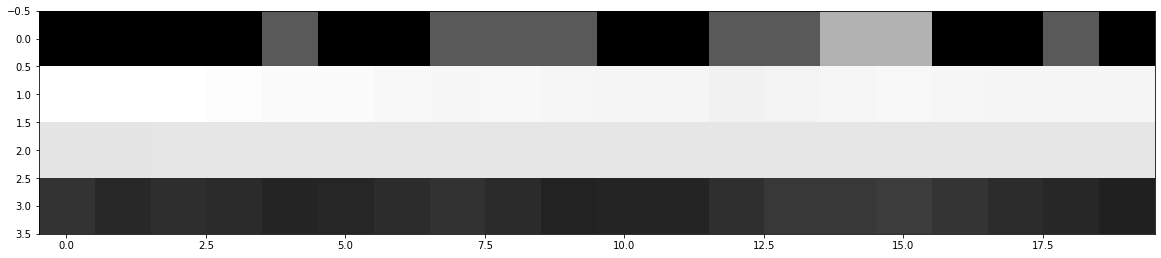

In [520]:
X, Y = next(train_g)
plt.figure(figsize=(20,20))
plt.imshow(cv2.resize(X.T,(20,5))[[0,1,3,4],:], cmap="gray")

In [521]:
Y.shape

(5,)

1147


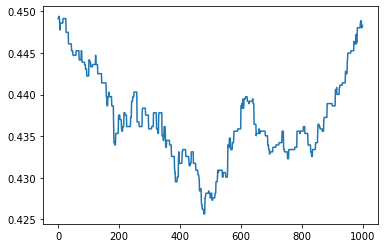

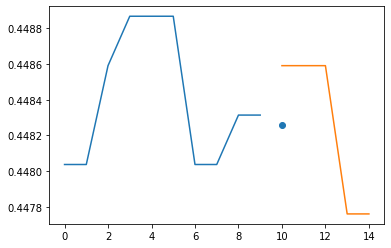

In [528]:
X, Y = next(train_g)
plt.plot(X[...,1])
plt.show()
plt.plot(X[...,1][-10:])
plt.plot(range(10,10+len(Y)),Y)
plt.scatter(10,Y.mean())

In [578]:
def generator2(d, window_size=100, future_deep=5, jitter=0):
    """
    d: dados de entrada - shape (n,m) onde n é o número de amostras e m o número de features
    window_size = comprimento da saída. número de amostras da saída
    future_deep: O número de amostras do futuro
    jitter: Saltos aleatórios
    """
    i = window_size #inicia numa posição que permite fazer um corte de window_size para trás
    while True:
        #print(i) #debug
        yield d[i-window_size:i][...,None], d[i:i+future_deep,1].mean()[...,None] #
        
        if jitter!=0:
            i+=random.randint(1,jitter+1)
        else:
            i+=1
        if i >= (len(d)-future_deep):
            i = window_size

In [619]:
def generator4(d, window_size=100, future_deep=5, jitter=0, batchsize=10):
    g = generator2(d, window_size, future_deep, jitter)
    while True:
        aux = [ next(g) for _ in range(batchsize)]
        yield np.array([_[0] for _ in aux]), np.array([_[1] for _ in aux])

In [620]:
tmp = generator4(data_train[20000:], 1000, future_deep=5, jitter=30)

In [621]:
X,Y = next(tmp)
X.shape, Y.shape

((10, 1000, 5, 1), (10, 1))

In [605]:
np.array([_[1] for _ in aux]).shape

(10, 1)

In [690]:
train_g = generator4(data_train[20000:24000], 1000, future_deep=5, jitter=30, batchsize=128)

In [683]:
X,Y = next(train_g)
X.shape, Y.shape

((128, 1000, 5, 1), (128, 1))

In [679]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Initialize the model
model = Sequential()

# Add five Conv2D layers
# Since one of the spatial dimensions (5) is much smaller than the other,
# you might want to use a kernel that spans the entire width of 5
# and only moves along the height (1000).
model.add(Conv2D(filters=1, kernel_size=(50, 5), activation='relu', input_shape=(1000, 5, 1)))
for _ in range(9):
    model.add(Conv2D(filters=1, kernel_size=(100, 1), activation='relu'))

# Flatten the output of the conv layers to feed into the dense layers
model.add(Flatten())

# Add two dense layers
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# Output layer with 20 units
model.add(Dense(1))  # Use softmax for classification or another activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use the appropriate loss function for your task

model.summary()

Model: "sequential_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 951, 1, 1)         251       
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 852, 1, 1)         101       
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 753, 1, 1)         101       
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 654, 1, 1)         101       
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 555, 1, 1)         101       
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 456, 1, 1)         101       
_________________________________________________________________
conv2d_223 (Conv2D)          (None, 357, 1, 1)       

In [681]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

# Initialize the model
model = Sequential()

# Add five Conv2D layers
# Since one of the spatial dimensions (5) is much smaller than the other,
# you might want to use a kernel that spans the entire width of 5
# and only moves along the height (1000).
model.add(Conv2D(filters=16, kernel_size=(900, 5), activation='relu', input_shape=(1000, 5, 1)))
#for _ in range(9):
#    model.add(Conv2D(filters=1, kernel_size=(100, 1), activation='relu'))

# Flatten the output of the conv layers to feed into the dense layers
model.add(Flatten())

# Add two dense layers
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))

# Output layer with 20 units
model.add(Dense(1))  # Use softmax for classification or another activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Use the appropriate loss function for your task

model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_227 (Conv2D)          (None, 101, 1, 16)        72016     
_________________________________________________________________
flatten_15 (Flatten)         (None, 1616)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 100)               161700    
_________________________________________________________________
dense_29 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 51        
Total params: 238,817
Trainable params: 238,817
Non-trainable params: 0
_________________________________________________________________


In [676]:
model.input_shape, model.output_shape, X.shape, Y.shape

((None, 1000, 5, 1), (None, 1), (128, 1000, 5, 1), (128, 1))

Epoch 1/2
100/100 [==============================] - 2s 11ms/step - loss: 5.2246e-04
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 9.0987e-06


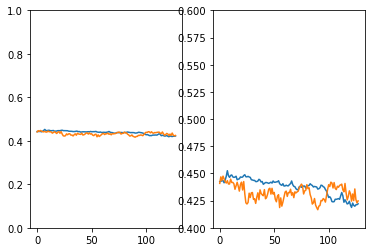

Epoch 1/2
100/100 [==============================] - 1s 10ms/step - loss: 8.6978e-06
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 8.4145e-06


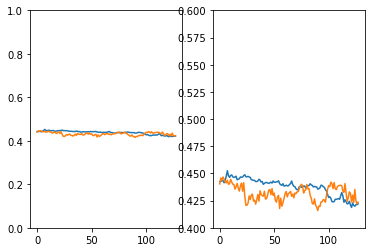

Epoch 1/2
100/100 [==============================] - 1s 11ms/step - loss: 8.1649e-06
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 8.4201e-06


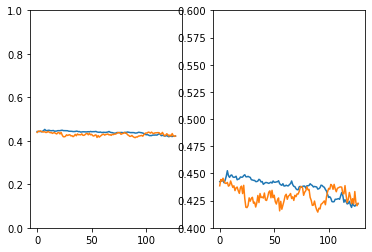

Epoch 1/2
100/100 [==============================] - 1s 11ms/step - loss: 7.9357e-06
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 8.0828e-06


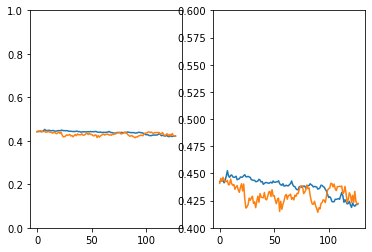

Epoch 1/2
100/100 [==============================] - 1s 11ms/step - loss: 8.0461e-06
Epoch 2/2
100/100 [==============================] - 1s 10ms/step - loss: 7.7331e-06


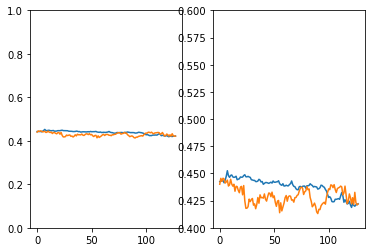

Epoch 1/2
100/100 [==============================] - 1s 10ms/step - loss: 7.8765e-06
Epoch 2/2
100/100 [==============================] - 1s 10ms/step - loss: 8.4407e-06


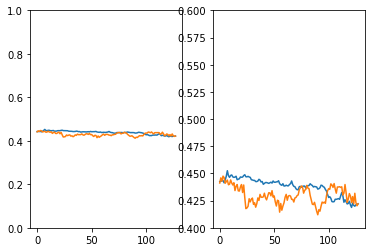

Epoch 1/2
100/100 [==============================] - 1s 10ms/step - loss: 8.5321e-06
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 1.1750e-05: 0s - loss: 1.1568e-0


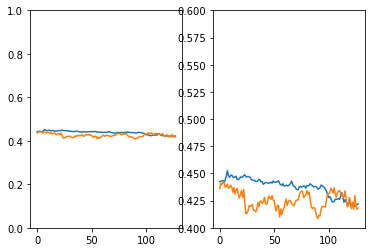

Epoch 1/2
100/100 [==============================] - 1s 11ms/step - loss: 1.6227e-05
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 3.0313e-05


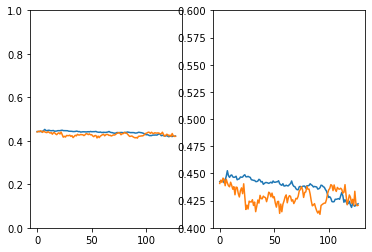

Epoch 1/2
100/100 [==============================] - 1s 11ms/step - loss: 1.0020e-05
Epoch 2/2
100/100 [==============================] - 1s 11ms/step - loss: 1.3023e-05


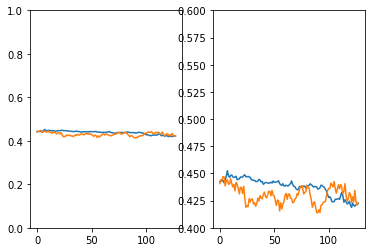

Epoch 1/2
100/100 [==============================] - 1s 10ms/step - loss: 1.4458e-05
Epoch 2/2
100/100 [==============================] - 1s 10ms/step - loss: 1.0156e-05


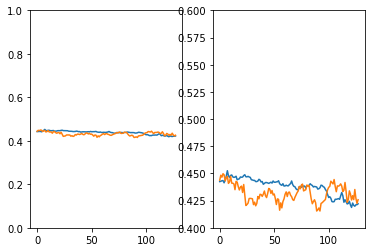

In [692]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')  # Use the appropriate loss function for your task
for i in range(10):
    model.fit(train_g, steps_per_epoch=100, epochs=2)
    plt.subplot(121)
    plt.ylim(0,1)
    plt.plot(Y)
    plt.plot(model.predict(X))
    plt.subplot(122)
    plt.ylim(0.4,0.6)
    plt.plot(Y)
    plt.plot(model.predict(X))
    plt.show()

In [687]:
test_gen = generator4(data_test[:], 1000, future_deep=5, jitter=0, batchsize=128)

In [688]:
X,Y = next(train_g)

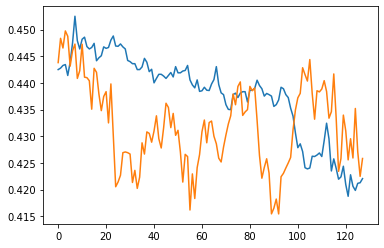

In [693]:
plt.plot(Y)
plt.plot(model.predict(X))

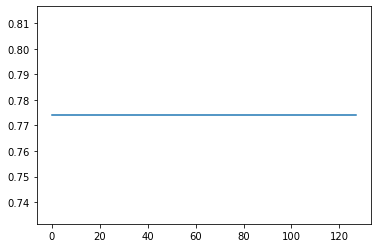

In [648]:
plt.plot(model.predict(X))

In [219]:
for i in range(20):
    X, Y = next(g)
    print(X[-1,1], Y)

4864
0.49972360420121614 0.4994472084024323
4870
0.5 0.5
4893
0.49917081260364843 0.4994472084024323
4920
0.4994472084024323 0.49917081260364843
4941
0.49889441680486457 0.49889441680486457
4966
0.498065229408513 0.498065229408513
4996
0.4994472084024323 0.4994472084024323
4997
0.4994472084024323 0.49972360420121614
5004
0.5002763957987839 0.5002763957987839
5005
0.5002763957987839 0.5002763957987839
5019
0.4994472084024323 0.5
5027
0.49972360420121614 0.49972360420121614
5031
0.49917081260364843 0.49917081260364843
5032
0.49917081260364843 0.49889441680486457
5057
0.4986180210060807 0.4986180210060807
5088
0.49834162520729686 0.49834162520729686
5102
0.496130458817026 0.49585406301824214
5117
0.49585406301824214 0.49585406301824214
5129
0.4972360420121614 0.4972360420121614
5131
0.4972360420121614 0.4972360420121614


In [ ]:
plt.imshow(X[...,])

In [1]:
!pip install dlib
import dlib

In [2]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=bf92497fed846044879f729c36903e441c21bf9c64ed4fdbca7176ec9f839fb3
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [13]:
import face_recognition

In [4]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-a.tgz

--2024-03-31 23:29:49--  http://vis-www.cs.umass.edu/lfw/lfw-a.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14486641 (14M) [application/x-gzip]
Saving to: ‘lfw-a.tgz’

lfw-a.tgz           100%[===================>]  13.82M  1.67MB/s    in 10s     

2024-03-31 23:30:00 (1.32 MB/s) - ‘lfw-a.tgz’ saved [14486641/14486641]



In [9]:
!tar -xzf lfw-a.tgz

In [14]:
all_files = glob("./lfw/**/*.*", recursive=True)

In [15]:
faces = {}
for f in all_files[:]:
  k = f.split(os.sep)[-2]
  try:
    faces[k]+=[f]
  except:
    faces[k]=[f]


In [16]:
for k in list(faces.keys()):
  if len(faces[k])<2:
    faces.pop(k, None)
    #print(k)

In [17]:
faces.keys()

dict_keys(['Aaron_Peirsol', 'Aaron_Sorkin', 'Abdel_Nasser_Assidi', 'Abdoulaye_Wade', 'Abdullah', 'Abdullah_al-Attiyah', 'Abdullah_Gul', 'Abdullatif_Sener', 'Abel_Pacheco', 'Abid_Hamid_Mahmud_Al-Tikriti', 'Adam_Sandler', 'Adam_Scott', 'Adel_Al-Jubeir', 'Adolfo_Aguilar_Zinser', 'Adolfo_Rodriguez_Saa', 'Adrian_McPherson', 'Adrian_Nastase', 'Adrien_Brody', 'Ahmad_Masood', 'Ahmed_Chalabi', 'Ahmet_Necdet_Sezer', 'Aicha_El_Ouafi', 'Aitor_Gonzalez', 'Ai_Sugiyama', 'Akbar_Hashemi_Rafsanjani', 'Akhmed_Zakayev', 'Alan_Ball', 'Alan_Greenspan', 'Alan_Mulally', 'Alastair_Campbell', 'Alberto_Fujimori', 'Alberto_Ruiz_Gallardon', 'Albert_Costa', 'Albrecht_Mentz', 'Aldo_Paredes', 'Alec_Baldwin', 'Alejandro_Atchugarry', 'Alejandro_Avila', 'Alejandro_Toledo', 'Aleksander_Kwasniewski', 'Alexander_Downer', 'Alexander_Losyukov', 'Alexander_Rumyantsev', 'Alexandra_Stevenson', 'Alexandra_Vodjanikova', 'Alex_Barros', 'Alex_Penelas', 'Alex_Sink', 'Alice_Fisher', 'Alicia_Silverstone', 'Alimzhan_Tokhtakhounov', 'A

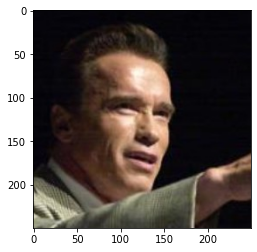

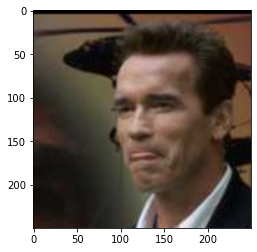

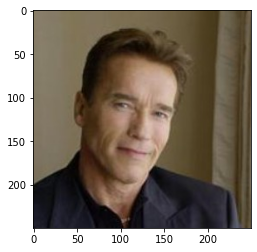

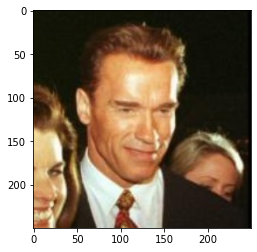

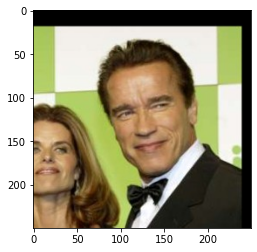

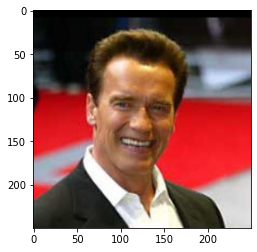

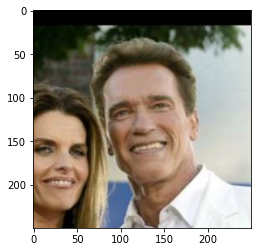

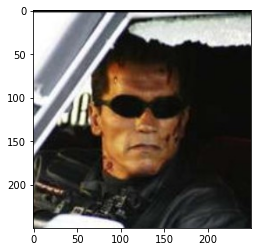

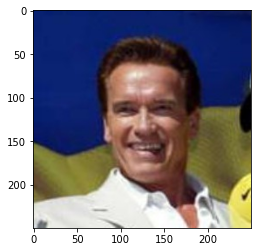

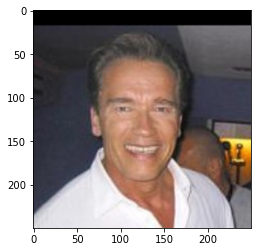

In [696]:
for f in faces["Arnold_Schwarzenegger"][:10]:
    plt.imshow(cv2.imread(f)[...,::-1])
    plt.show()

In [18]:
embeddings = {_:[] for _ in faces.keys()}
for k in faces.keys():
  print(k)
  for f in faces[k]:
    try:
      embeddings[k] += [face_recognition.face_encodings(face_recognition.load_image_file(f))[0]]
    except:
      embeddings[k] += [None]


Aaron_Peirsol
Aaron_Sorkin
Abdel_Nasser_Assidi
Abdoulaye_Wade
Abdullah
Abdullah_al-Attiyah
Abdullah_Gul
Abdullatif_Sener
Abel_Pacheco
Abid_Hamid_Mahmud_Al-Tikriti
Adam_Sandler
Adam_Scott
Adel_Al-Jubeir
Adolfo_Aguilar_Zinser
Adolfo_Rodriguez_Saa
Adrian_McPherson
Adrian_Nastase
Adrien_Brody
Ahmad_Masood
Ahmed_Chalabi
Ahmet_Necdet_Sezer
Aicha_El_Ouafi
Aitor_Gonzalez
Ai_Sugiyama
Akbar_Hashemi_Rafsanjani
Akhmed_Zakayev
Alan_Ball
Alan_Greenspan
Alan_Mulally
Alastair_Campbell
Alberto_Fujimori
Alberto_Ruiz_Gallardon
Albert_Costa
Albrecht_Mentz
Aldo_Paredes
Alec_Baldwin
Alejandro_Atchugarry
Alejandro_Avila
Alejandro_Toledo
Aleksander_Kwasniewski
Alexander_Downer
Alexander_Losyukov
Alexander_Rumyantsev
Alexandra_Stevenson
Alexandra_Vodjanikova
Alex_Barros
Alex_Penelas
Alex_Sink
Alice_Fisher
Alicia_Silverstone
Alimzhan_Tokhtakhounov
Alison_Lohman
Ali_Abbas
Ali_Khamenei
Ali_Naimi
Allen_Iverson
Allison_Janney
Allyson_Felix
Alvaro_Noboa
Alvaro_Silva_Calderon
Alvaro_Uribe
Al_Davis
Al_Gore
Al_Pacino
A

In [699]:
embeddings["Arnold_Schwarzenegger"][0].shape

(128,)

In [19]:
len(embeddings["Arnold_Schwarzenegger"])+len(embeddings["Angelina_Jolie"])

62

In [20]:
embs = np.array(embeddings["Arnold_Schwarzenegger"]+embeddings["Angelina_Jolie"]+embeddings["Al_Pacino"]+embeddings["Al_Gore"])
embs.shape

(73, 128)

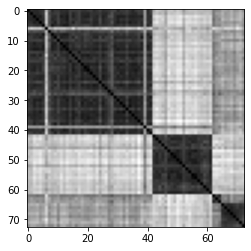

In [21]:
plt.imshow(np.array([ ((embs-_)**2).sum(axis=1) for _ in embs]), cmap="gray")

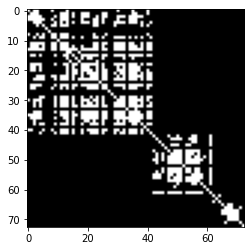

In [704]:
plt.imshow(np.array([ ((embs-_)**2).sum(axis=1) for _ in embs])<0.2, cmap="gray")